# Predict Resale Price of Cars

# Overview of dataset

# Importing module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Installing dataset

In [3]:
data = pd.read_csv('cars24-car-price-cleaned.csv')
data.head(5)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [11]:
data.shape

(19820, 18)

In [8]:
data.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [10]:
data.describe()

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
count,19820.000000,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,2014.561453,5.815856e+04,19.503402,1475.702381,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.487841,0.802674,0.835015,0.152825
std,4.847364,3.196636,5.171563e+04,4.297784,518.571223,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.499865,0.397990,0.371176,0.359828
min,0.300000,1992.000000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2013.000000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.200000,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,20.902500,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


# Make and Model are categorical variable

# We will be using Target Variable Encoding

In [14]:
data['make'] = data.groupby('make')['selling_price'].transform('mean')
data['model'] = data.groupby('model')['selling_price'].transform('mean')

In [15]:
data.head(10)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0
5,3.50,2013.0,35000,18.90,998.0,67.10,10.0,4.684721,2.834194,1,0,0,0,0,1,1,1,0
6,3.15,2013.0,40000,20.36,1197.0,78.90,10.0,5.458819,3.117895,0,0,0,0,0,1,1,1,0
7,4.10,2018.0,17512,20.51,998.0,67.04,5.0,4.684721,3.329634,0,0,0,0,0,1,1,1,0
8,10.50,2019.0,20000,18.15,998.0,118.35,4.0,5.458819,10.939000,1,0,0,0,0,1,0,1,0
9,5.75,2017.0,70000,18.49,1493.0,100.00,6.0,7.315421,6.566667,0,0,1,0,0,0,1,0,1


# Now lets scale our data for different features

# i.e km_driven & age are in different scales. We will using min-max scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(data=scaler.fit_transform(data), columns=data.columns)
data_scaled.head(5)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Train & Test Splitting

In [18]:
from sklearn.model_selection import train_test_split
y = data_scaled['selling_price']
data_scaled.drop(['selling_price'], axis=1, inplace=True)

y.shape, data_scaled.shape

((19820,), (19820, 17))

# We have to predict 1 Output feature using 17 input features

# We opt 70:30 split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, y, test_size=.3, random_state=1)

In [24]:
x_train.shape

(13874, 17)

In [25]:
x_test.shape

(5946, 17)

In [26]:
y_train.shape, y_test.shape

((13874,), (5946,))

# Lin. Regression using single value Model

In [30]:
data_reg = data_scaled[['model']]
data_reg_train1 = x_train[['model']]
data_reg_test1 = x_test[['model']]

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_reg_train1, y_train)

LinearRegression()

In [33]:
model.coef_

array([0.9967642])

In [34]:
model.intercept_

0.001523750584612571

In [35]:
y_hat = model.predict(data_reg)

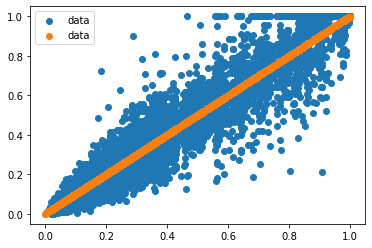

In [37]:
fig = plt.figure()
plt.scatter(data_reg, y, label = 'data')
plt.scatter(data_reg, y_hat, label = 'data')
plt.legend()
plt.show()